# Linear Regression Model for Housing

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Work with datasets

In [ ]:
df1 = pd.read_csv("Housing.csv")
df1.head()
df1.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df1.shape

(545, 13)

In [ ]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df1['bedrooms'].unique()

array([4, 3, 5, 2, 6, 1])

In [ ]:
df1['bathrooms'].unique()

array([2, 4, 1, 3])

In [ ]:
df1['parking'].unique()

array([2, 3, 0, 1])

**- Data Cleaning**

In [ ]:
df1.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df1['price'].min()

1750000

In [ ]:
df1['price'].max()

13300000

In [ ]:
df1['area'].min()

1650

In [ ]:
df1['area'].max()

16200

**- Feature Engineering for mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus**

In [ ]:
df1.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
df1.mainroad

df1.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
df1.guestroom

df1.basement.replace(('yes', 'no'), (1, 0), inplace=True)
df1.basement

df1.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
df1.hotwaterheating

df1.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
df1.airconditioning

df1.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
df1.prefarea

df1.furnishingstatus.replace(('furnished', 'semi-furnished', 'unfurnished'), (1, 2, 3), inplace=True)
df1.furnishingstatus

# Data Visualization

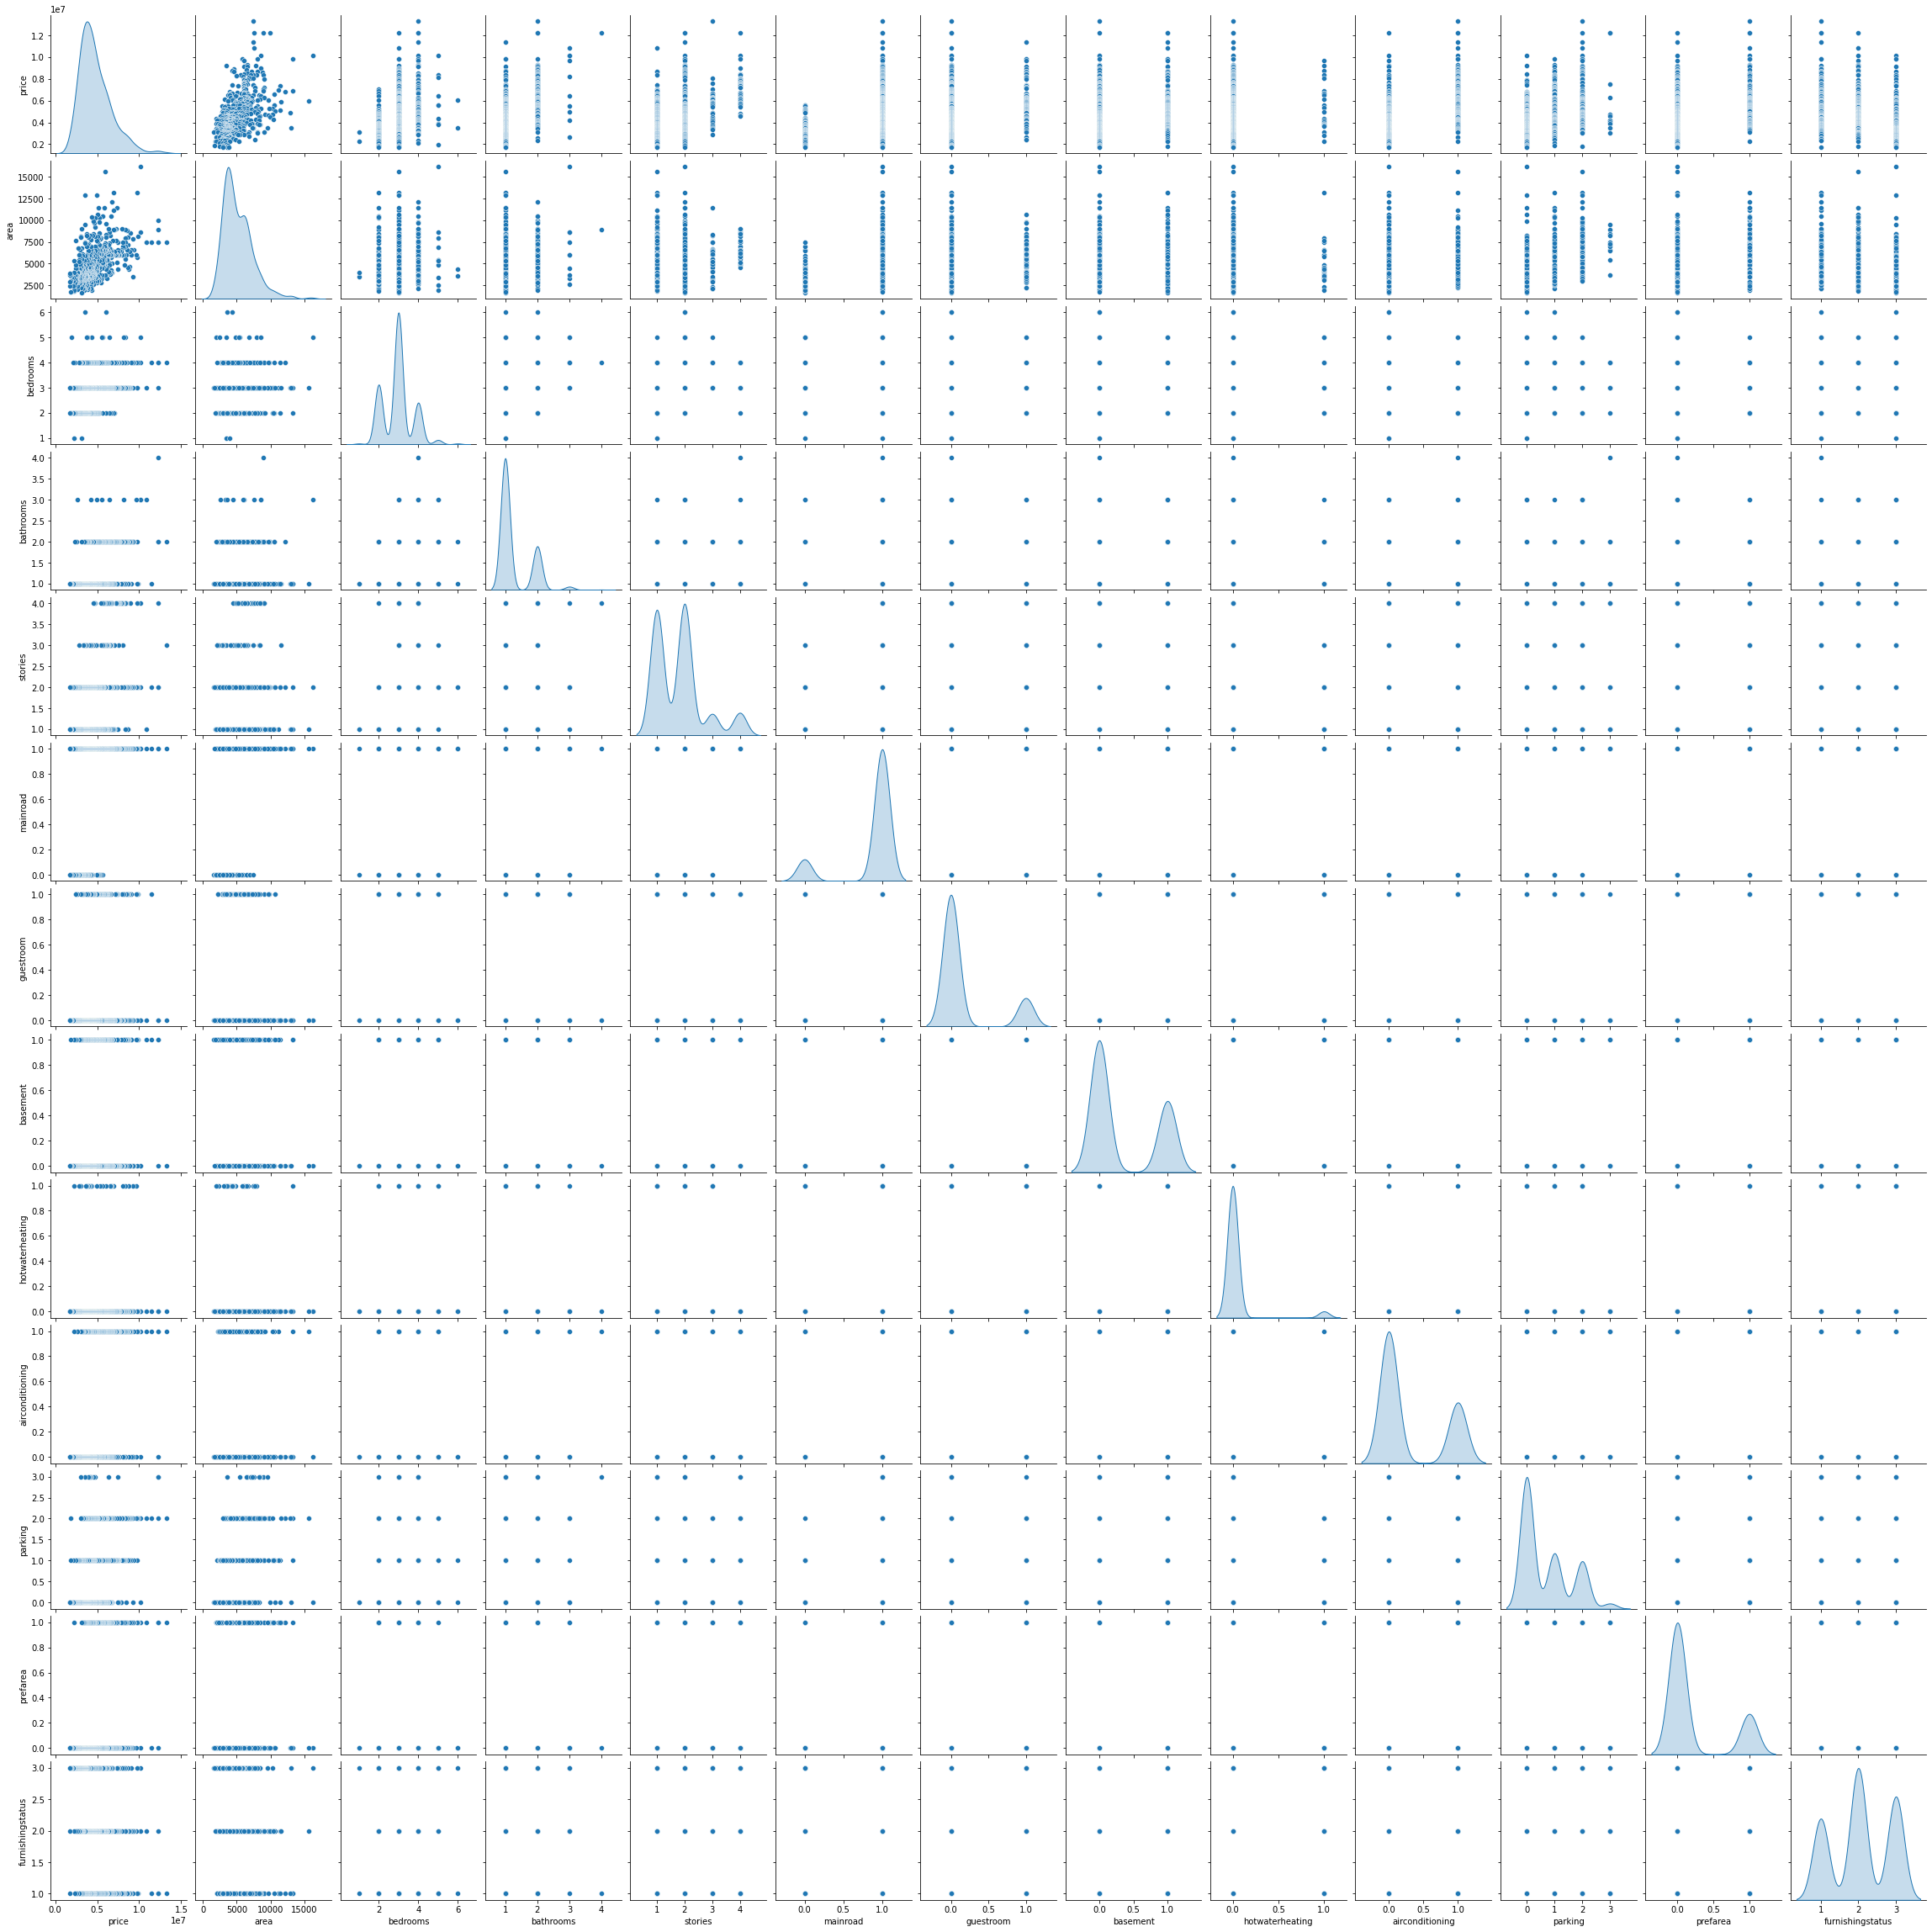

In [ ]:
sns.pairplot(data=df1, diag_kind='kde')

# Define X and y variables

In [ ]:
X = df1.drop(['price'],axis='columns')
X
X.ndim

2

In [ ]:
y = df1.price
y.values
y.ndim

1

# Split X and y variables into train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Train the model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test.values

array([[3150,    3,    1, ...,    0,    0,    3],
       [4040,    2,    1, ...,    1,    0,    2],
       [4500,    4,    2, ...,    2,    0,    1],
       ...,
       [7350,    2,    1, ...,    1,    0,    2],
       [4350,    2,    1, ...,    0,    0,    3],
       [5300,    4,    2, ...,    0,    1,    3]])

In [ ]:
def predict_price(area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus):
  x = np.array([area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus])
  x = np.array([x])
  #print(x.ndim)
  prediction = model.predict(x)
  print(prediction)

In [ ]:
predict_price(4000,3,3,2,1,1,0,1,0,2,1,2)

[7767457.39646476]


In [ ]:
predict_price(5000,3,3,2,1,1,0,1,0,2,1,2)

[8010569.83944301]


In [ ]:
predict_price(3000,3,3,2,1,1,0,1,0,2,1,2)

[7524344.95348651]


In [ ]:
predict_price(4000,4,4,2,1,1,1,1,0,2,1,2)

[9258950.58055031]


In [ ]:
print("Accuracy of the model : ",r2_score(y_test,y_pred)*100)

Accuracy of the model :  73.31102153370126
